# 데이터 만들기

<function matplotlib.pyplot.show(close=None, block=None)>

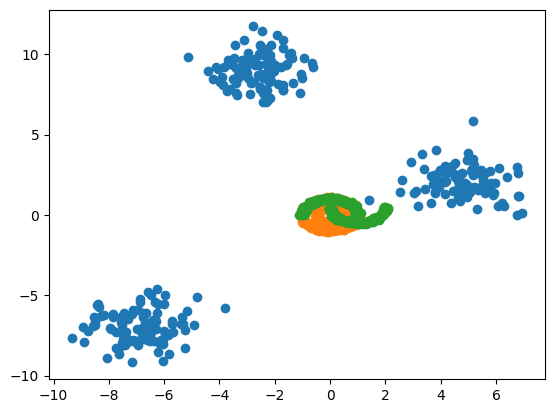

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

blobs_X, blobs_y = make_blobs(n_samples=300, centers = 3, cluster_std=1.0, random_state=42)
circles_X, circles_y = make_circles(n_samples=300, factor=0.5, noise=0.05)
moons_X, moons_y = make_moons(n_samples=300, noise=0.05)

plt.scatter(blobs_X[:, 0], blobs_X[:, 1])
plt.show

plt.scatter(circles_X[:, 0], circles_X[:, 1])
plt.show

plt.scatter(moons_X[:, 0], moons_X[:, 1])
plt.show

# K-Means

In [2]:
import numpy as np
from numpy.linalg import norm

class Kmeans:
    def __init__(self, n_clusters, max_iter=100) -> None:
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None  # 분산
        self.centroid_history_ = []  # 중심점 추적 기록
        self.inertia_history_ = []   # 각 반복의 분산 값 기록

    def fit(self, X):
        # 초기 중심점 설정
        # self.cluster_centers_ = X[np.random.choice(range(len(X)), self.n_clusters, replace=False)]
        self.cluster_centers_ = np.array([(2, 3), (3, 3)])
        self.centroid_history_.append(self.cluster_centers_.copy())  # 초기 중심점 기록
        
        for _ in range(self.max_iter):
            # 각 데이터 포인트와 중심점 사이의 거리 계산 및 할당
            distance = norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
            self.labels_ = np.argmin(distance, axis=1)

            # 새로운 중심점 계산
            cluster_centers = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            # 변화가 없을 경우 종료
            if np.all(self.cluster_centers_ == cluster_centers):
                break

            self.cluster_centers_ = cluster_centers
            self.centroid_history_.append(self.cluster_centers_.copy())  # 현재 중심점 기록
            
            # 분산 계산 및 기록
            inertia = np.sum(distance[np.arange(len(self.labels_)), self.labels_] ** 2)
            self.inertia_history_.append(inertia)

        # 최종 분산 계산
        self.inertia_ = np.sum(distance[np.arange(len(self.labels_)), self.labels_] ** 2)
        self.inertia_history_.append(self.inertia_)  # 마지막 반복의 분산 값 기록
    
    def get_centroid_and_inertia_history(self):
        """
        각 반복(iteration)별 중심점(centroid)과 분산(inertia)을 반환하는 함수
        """
        return np.array(self.centroid_history_), np.array(self.inertia_history_)


In [3]:
data_points = np.array([
    (1, 1),
    (1, 2),
    (1, 4),
    (1, 5),
    (2, 1),
    (4, 4)
])

model = Kmeans(n_clusters=2)
model.fit(data_points)


In [4]:
# 각 반복별 중심점과 분산 추적
centroid_history, inertia_history = model.get_centroid_and_inertia_history()

print("Centroid History:")
print(centroid_history)

print("Inertia History:")
print(inertia_history)

Centroid History:
[[[2.  3. ]
  [3.  3. ]]

 [[1.2 2.6]
  [4.  4. ]]]
Inertia History:
[20. 14.]


# Scikit-Learn

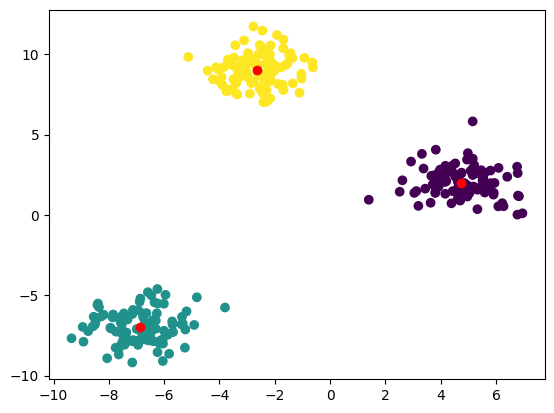

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(blobs_X)

plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c="red")
plt.show()

In [6]:
import numpy as np

# 데이터 포인트
data_points = np.array([
    (1, 1),
    (1, 2),
    (1, 4),
    (1, 5),
    (2, 1),
    (4, 4)
])

# 초기 센트로이드
centroids = np.array([
    (2, 3),
    (3, 3)
])

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = np.array([euclidean_distance(point, centroid) for centroid in centroids])
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def recalculate_centroids(data, clusters, num_clusters):
    new_centroids = []
    for i in range(num_clusters):
        points_in_cluster = data[clusters == i]
        if len(points_in_cluster) > 0:
            new_centroid = np.mean(points_in_cluster, axis=0)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(centroids[i])  # 클러스터에 포인트가 없는 경우 이전 센트로이드 유지
    return np.array(new_centroids)

def k_means_clustering(data, initial_centroids, num_clusters):
    centroids = initial_centroids
    while True:
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = recalculate_centroids(data, clusters, num_clusters)
        if np.array_equal(old_centroids, centroids):
            break
    return centroids, clusters

# 클러스터링 실행
final_centroids, final_clusters = k_means_clustering(data_points, centroids, 2)

print("최종 센트로이드:")
print(final_centroids)

최종 센트로이드:
[[1.2 2.6]
 [4.  4. ]]
